# Exercise 1: House price levels and dispersion

For this exercise, we're using data on around 3,000 observations of house prices and house characteristics from Ames, a small city in Iowa.

1.  Load the Ames housing data set from `ames_houses.csv` located in the `data/` folder.

    To familiarize yourself with the data, report the columns present in the DataFrame and 
    then restrict the data to the columns `SalePrice` and `Neighborhood`.
    
    Check that there are no observations with missing values in the final data set.

2.  Compute the average house price (column `SalePrice`) by neighborhood (column `Neighborhood`). List the three most expensive neighborhoods, for example by using [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

    Create a bar chart showing the average sale price for all neighborhoods in descending order.

    *Hint:* You can create the bar chart by either using pandas's 
    [`DataFrame.plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
    or Matplotlib's
    [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

3.  You want to quantify the price dispersion in each neighborhood. To this end, compute the standard deviation by neighborhood using [`std()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html). Which are the three neighborhoods with the most dispersed prices?

    Create a scatter plot with the average house price on the $x$-axes and the standard deviation on the $y$-axis.
    Is there a relationship between the average house prices and their dispersion within neighborhood?

    *Hint:* You can create the scatter plot by either using pandas's 
    [`DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
    or Matplotlib's 
    [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

In [46]:
DATA_PATH = '../../data'
AH = f'{DATA_PATH}/ames_houses.csv'

import pandas as pd
df = pd.read_csv(AH)

In [47]:
df

,LotArea,Neighborhood,OverallQuality,OverallCondition,YearBuilt,YearRemodeled,BuildingType,CentralAir,LivingArea,Bathrooms,Bedrooms,Fireplaces,SalePrice,YearSold,MonthSold,HasGarage
0,2951.2,NAmes,6,5,1960,1960,Single-family,Y,153.8,1,3,2,215.0,2010,5,1
1,1079.6,NAmes,5,6,1961,1961,Single-family,Y,83.2,1,2,0,105.0,2010,6,1
2,1325.3,NAmes,6,6,1958,1958,Single-family,Y,123.5,1,3,0,172.0,2010,6,1
3,1036.7,NAmes,7,5,1968,1968,Single-family,Y,196.0,2,3,2,244.0,2010,4,1
4,1284.7,Gilbert,5,5,1997,1998,Single-family,Y,151.3,2,3,1,189.9,2010,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,737.3,Mitchel,6,6,1984,1984,Single-family,Y,93.2,1,3,0,142.5,2006,3,1
2926,825.4,Mitchel,5,5,1983,1983,Single-family,Y,83.8,1,2,0,131.0,2006,6,1
2927,969.9,Mitchel,5,5,1992,1992,Single-family,Y,90.1,1,3,0,132.0,2006,7,0
2928,929.9,Mitchel,5,5,1974,1975,Single-family,Y,129.0,1,2,1,170.0,2006,4,1


In [48]:
df = df[['SalePrice', 'Neighborhood']]

In [49]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     2930 non-null   float64
 1   Neighborhood  2930 non-null   object 
dtypes: float64(1), object(1)
memory usage: 45.9+ KB


In [50]:
groups = df.groupby('Neighborhood')
groups['SalePrice'].mean().sort_values(ascending = False).head(3).round(1)

Neighborhood
NoRidge    330.3
StoneBr    324.2
NridgHt    322.0
Name: SalePrice, dtype: float64

Text(0.5, 0, 'Neighborhoods')

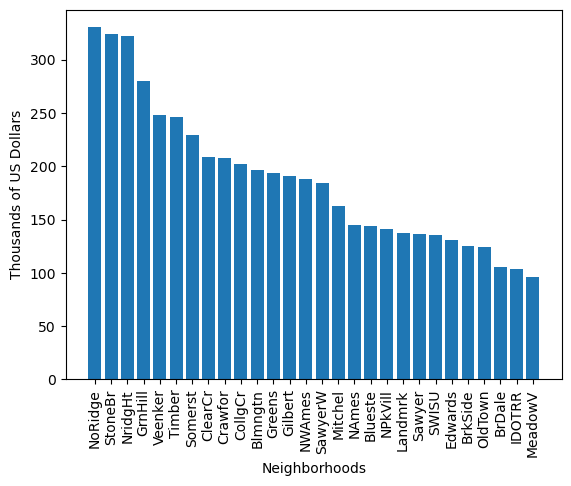

In [51]:
import matplotlib.pyplot as plt

mean_price = groups['SalePrice'].mean().sort_values(ascending = False)

plt.bar(mean_price.index, mean_price)
plt.tick_params(axis = 'x', rotation = 90)
plt.ylabel('Thousands of US Dollars')
plt.xlabel('Neighborhoods')

<Axes: title={'center': 'Average house price by neighborhood'}, xlabel='Neighborhood', ylabel='Thousands of US Dollars'>

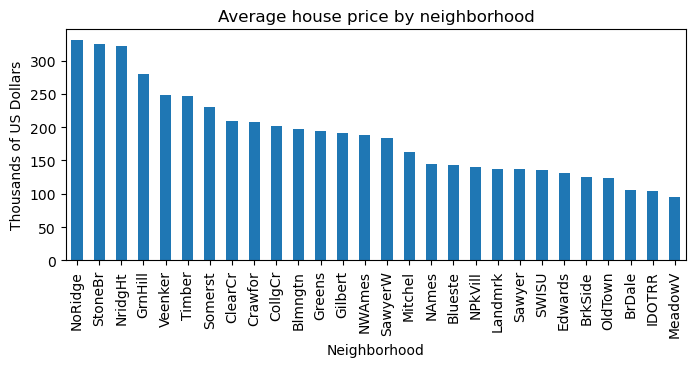

In [52]:
mean_price = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = False)

mean_price.plot.bar(
    title = 'Average house price by neighborhood',
    ylabel = 'Thousands of US Dollars',
    figsize = (8,3)
)

In [53]:
mean_price

Neighborhood
NoRidge    330.321127
StoneBr    324.227451
NridgHt    322.019277
GrnHill    280.000000
Veenker    248.316667
Timber     246.602778
Somerst    229.707692
ClearCr    208.661364
Crawfor    207.552427
CollgCr    201.804120
Blmngtn    196.660714
Greens     193.537500
Gilbert    190.646667
NWAmes     188.406870
SawyerW    184.071200
Mitchel    162.225439
NAmes      145.097065
Blueste    143.590000
NPkVill    140.713043
Landmrk    137.000000
Sawyer     136.750993
SWISU      135.070833
Edwards    130.843814
BrkSide    124.756481
OldTown    123.992469
BrDale     105.610000
IDOTRR     103.751613
MeadowV     95.756757
Name: SalePrice, dtype: float64

In [54]:
groups['SalePrice'].std().sort_values(ascending=False).head(3).round(1)

Neighborhood
StoneBr    119.3
NoRidge    101.4
NridgHt     95.9
Name: SalePrice, dtype: float64

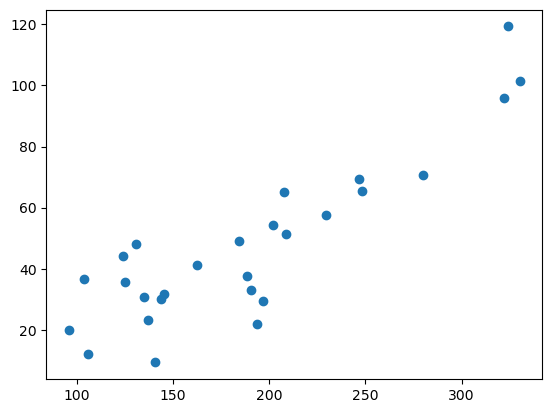

In [55]:
std_price = groups['SalePrice'].std()
avg_price = groups['SalePrice'].mean()

plt.scatter(avg_price, std_price)

<Axes: xlabel='mean', ylabel='std'>

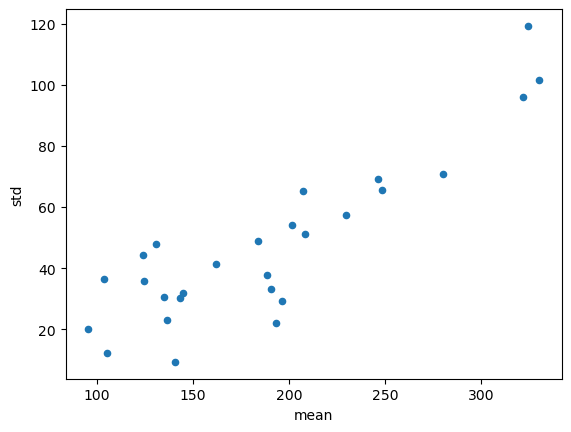

In [56]:
stats = df.groupby('Neighborhood')['SalePrice'].agg(['mean', 'std'])
stats.plot.scatter(x='mean', y='std')

***
# Exercise 2: Determinants of house prices

For this exercise, we're using data on around 3,000 observations of house prices and house characteristics from Ames, a small city in Iowa,
to understand how house prices vary with selected house characteristics.

1.  Load the Ames housing data set from `ames_houses.csv` located in the `data/` folder, and keep only the
    columns `SalePrice`, `LotArea`, `YearBuilt`, and `Bedrooms`.

    Restrict your data set to houses with one or more bedrooms and a lot area of at least 100m².

2.  Compute the average year in which a house was built (using the column `YearBuilt`). Create a new column `New` which takes on the value of 1 if the house was built after the average year of construction (_"new"_), and 0 otherwise (_"old"_). 

    What is the average year of construction within these two categories?

3.  Create a new column `Rooms` which categorizes the number of `Bedrooms` into three groups: 1, 2, and 3 or more. You can create these categories using boolean indexing, [`np.where()`](https://numpy.org/doc/2.0/reference/generated/numpy.where.html), pandas's [`where()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html), or some other way.

4.  Compute the mean `SalePrice` within each group formed by `New` and `Rooms` (for a total of 6 different categories) using [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).

    What is the average price difference between an old house with 1 bedroom and a new house with 3+ bedrooms?

5.  Create a figure with two subplots arranged in two columns. The left column should contain a bar chart showing
    the average house price by number of bed rooms (1, 2, 3+) for _old_ houses, whereas the 
    right column should show the corresponding bars for _new_ houses.

In [57]:
DATA_PATH = '../../data'
AH = f'{DATA_PATH}/ames_houses.csv'

import pandas as pd
df = pd.read_csv(AH)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LotArea           2930 non-null   float64
 1   Neighborhood      2930 non-null   object 
 2   OverallQuality    2930 non-null   int64  
 3   OverallCondition  2930 non-null   int64  
 4   YearBuilt         2930 non-null   int64  
 5   YearRemodeled     2930 non-null   int64  
 6   BuildingType      2767 non-null   object 
 7   CentralAir        2930 non-null   object 
 8   LivingArea        2930 non-null   float64
 9   Bathrooms         2930 non-null   int64  
 10  Bedrooms          2930 non-null   int64  
 11  Fireplaces        2930 non-null   int64  
 12  SalePrice         2930 non-null   float64
 13  YearSold          2930 non-null   int64  
 14  MonthSold         2930 non-null   int64  
 15  HasGarage         2930 non-null   int64  
dtypes: float64(3), int64(10), object(3)
memory

In [59]:
df = df[['SalePrice', 'LotArea', 'YearBuilt', 'Bedrooms']]

In [60]:
df.loc[(df['LotArea'] >= 1) & (df['LotArea'] >= 100)]

,SalePrice,LotArea,YearBuilt,Bedrooms
0,215.0,2951.2,1960,3
1,105.0,1079.6,1961,2
2,172.0,1325.3,1958,3
3,244.0,1036.7,1968,3
4,189.9,1284.7,1997,3
...,...,...,...,...
2925,142.5,737.3,1984,3
2926,131.0,825.4,1983,2
2927,132.0,969.9,1992,3
2928,170.0,929.9,1974,2


In [61]:
df = df.query('Bedrooms >= 1 & LotArea >= 100').copy()

In [62]:
print(f'Number of observations in final sample: {len(df):,d}')

Number of observations in final sample: 2,922


In [63]:
avg_year = df['YearBuilt'].mean()

In [64]:
df['New'] = df['YearBuilt'] >= avg_year

In [65]:
df['New'].astype(int)

0       0
1       0
2       0
3       0
4       1
       ..
2925    1
2926    1
2927    1
2928    1
2929    1
Name: New, Length: 2922, dtype: int64

In [66]:
df.groupby('New')['YearBuilt'].mean()

New
False    1945.149148
True     1995.678336
Name: YearBuilt, dtype: float64

In [67]:
df['Bedrooms'].value_counts().sort_index()

Bedrooms
1     112
2     743
3    1597
4     400
5      48
6      21
8       1
Name: count, dtype: int64

In [68]:
import numpy as np
df['Rooms'] = np.fmin(3, df['Bedrooms'])

In [69]:
pd.crosstab(df['Bedrooms'], df['Rooms'])

Rooms,1,2,3
Bedrooms,,,
1,112,0,0
2,0,743,0
3,0,0,1597
4,0,0,400
5,0,0,48
6,0,0,21
8,0,0,1


In [70]:
df['Rooms'] = np.where(df['Bedrooms'] < 3, df['Bedrooms'], 3)

In [75]:
mean_price = df.groupby(['New', 'Rooms'])['SalePrice'].mean()

In [78]:
diff = mean_price.loc[(True, 3)] - mean_price.loc[False, 1]

In [79]:
print(f'Difference in price: {diff:.1f}')

Difference in price: 122.6


Text(0.5, 0, 'Number of rooms')

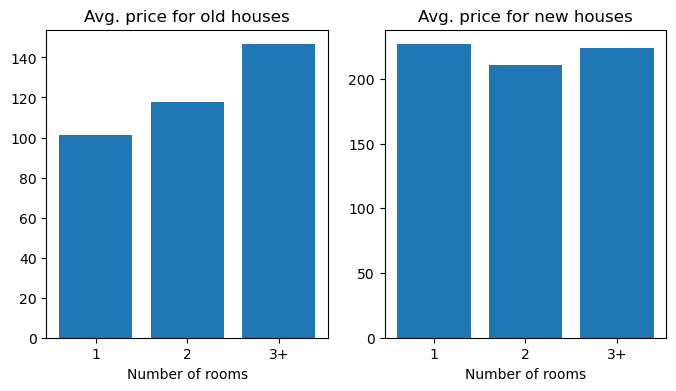

In [87]:
fig, axes = plt.subplots(1, 2, figsize = [8, 4])

mean_price = df.groupby(['New', 'Rooms'])['SalePrice'].mean()
xvalues = ['1', '2', '3+']

axes[0].bar(xvalues, mean_price.loc[False])
axes[0].set_title('Avg. price for old houses')
axes[0].set_xlabel('Number of rooms')

axes[1].bar(xvalues, mean_price.loc[True])
axes[1].set_title('Avg. price for new houses')
axes[1].set_xlabel('Number of rooms')

***
# Exercise 3: Inflation and unemployment in the US

In this exercise, you'll be working with selected macroeconomic variables for the United States reported at monthly frequency obtained from [FRED](https://fred.stlouisfed.org/).
The data set starts in 1948 and contains observations for a total of 864 months.

1.  Load the data from the file `FRED_monthly.csv` located in the `data/FRED` folder. Print the first 10 observations to get an idea how the data looks like.
    
    Keep only the columns `Year`, `Month`, `CPI`, and `UNRATE`. Moreover, perform this analysis only on observations prior to 1970 and drop the rest.

2.  The column `CPI` stores the consumer price index for the US. You may be more familiar with the concept of inflation, which is the percent change of the CPI relative to the previous period. 
    Create a new column `Inflation` which contains the _annual_ inflation _in percent_ relative to the same month in the previous year by applying 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) to the column `CPI`.

    *Hints:* 
    
    -   Since this is monthly data, you need to pass the arguments `periods=12` to `pct_change()` to get annual percent changes.
    -   You need to multiply the values returned by `pct_change()` by 100 to get percent values.

3.  Compute the average unemployment rate (column `UNRATE`) over the whole sample period. Create a new column `UNRATE_HIGH` that contains an indicator whenever the unemployment rate is above its average value (_"high unemployment period"_). 
    -   How many observations fall into the high- and the low-unemployment periods?
    -   What is the average unemployment rate in the high- and low-unemployment periods?

4.  Compute the average inflation rate for high- and low-unemployment periods. Is there any difference?

5.  Use [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) to aggregate
    the inflation data to annual frequency and compute the average inflation within each calendar year.

    -   Report the three years with the highest inflation rates.
    -   Create a plot that shows the average annual inflation over the sample period.

    *Hint:* Use the resampling rule `'YE'` when calling `resample()`.
